### Logistic Regression Algorithm

In [1]:
# import the necessary libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv("HR_comma_sep.csv")
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data1.shape

(14999, 10)

In [6]:
# checking for the null values
data1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# summary statistics
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [9]:
#Checking the unique values in the left column
data1.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [10]:
# doing cross tabulation to checking how the statisfactory level affected employee retention
pd.crosstab(data1.satisfaction_level, data1.left)

left,0,1
satisfaction_level,,
0.09,0,195
0.10,0,358
0.11,0,335
0.12,26,4
0.13,51,3
...,...,...
0.96,203,0
0.97,176,0
0.98,183,0


Text(0.5, 1.0, 'Bar graph for statifaction level vs employee retention')

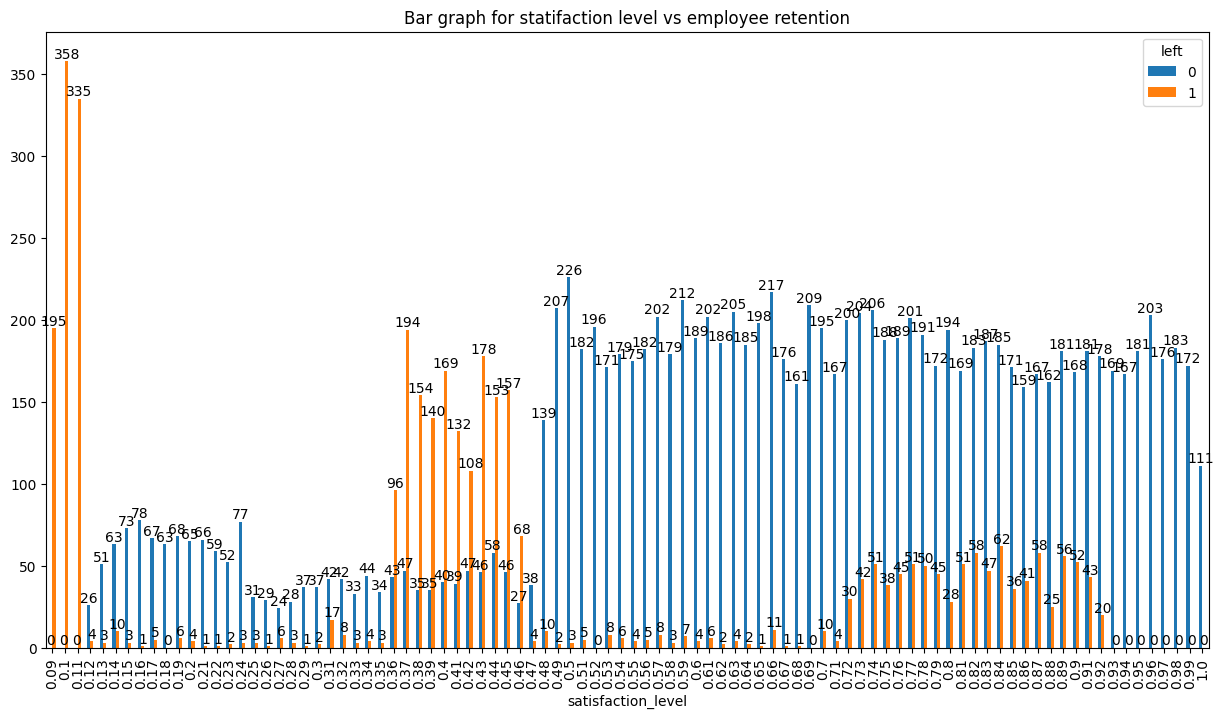

In [16]:
ax = pd.crosstab(data1.satisfaction_level, data1.left).plot(kind = "bar", figsize = (15,8))
for p in ax.containers: # p - represents each bin on the bar
                        # ax.containers contains the bar objects
    ax.bar_label(p)

plt.title("Bar graph for statifaction level vs employee retention")

## 0 on left column means -->  did not leave the company
## 1 on left column means --> left the company

In [17]:
pd.crosstab(data1.number_project, data1.left)

left,0,1
number_project,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


Text(0.5, 1.0, 'Bar graph for number_project vs employee retention')

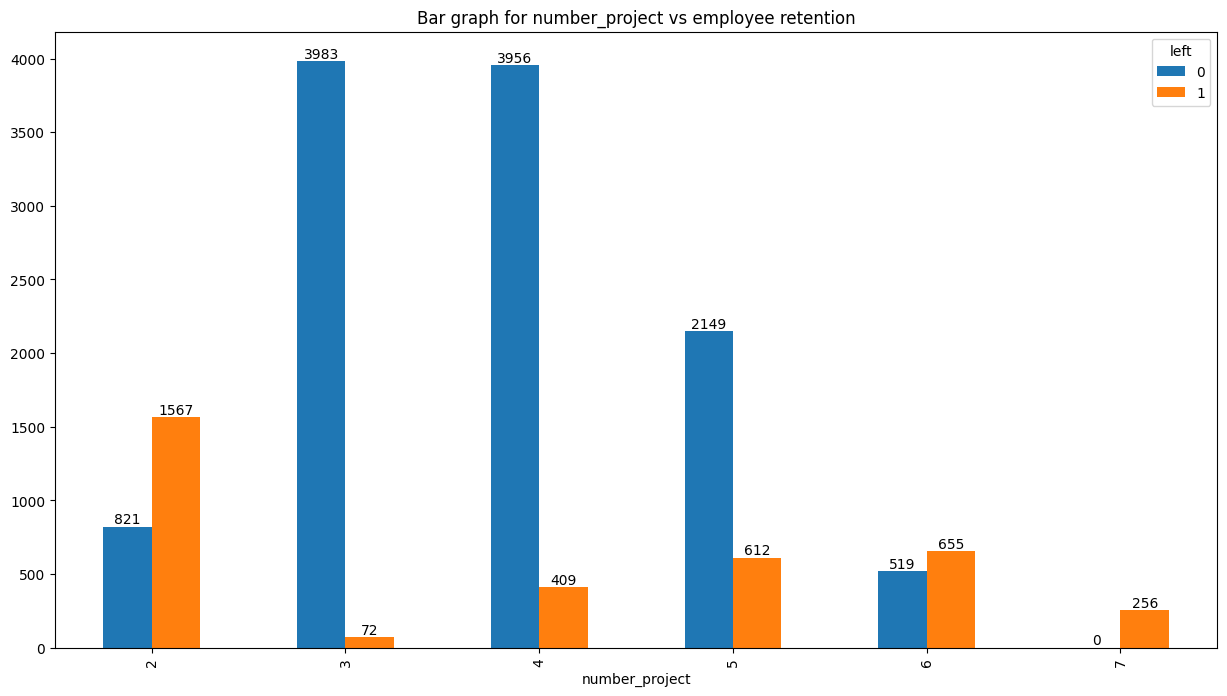

In [18]:
ax = pd.crosstab(data1.number_project, data1.left).plot(kind = "bar", figsize = (15,8))
for p in ax.containers: # p - represents each bin on the bar
                        # ax.containers contains the bar objects
    ax.bar_label(p)

plt.title("Bar graph for number_project vs employee retention")

In [19]:
data1.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [20]:
pd.crosstab(data1.average_montly_hours, data1.left)

left,0,1
average_montly_hours,,
96,6,0
97,14,0
98,23,0
99,11,0
100,19,0
...,...,...
306,0,18
307,0,14
308,0,20


Text(0.5, 1.0, 'Bar graph for average_montly_hours vs employee retention')

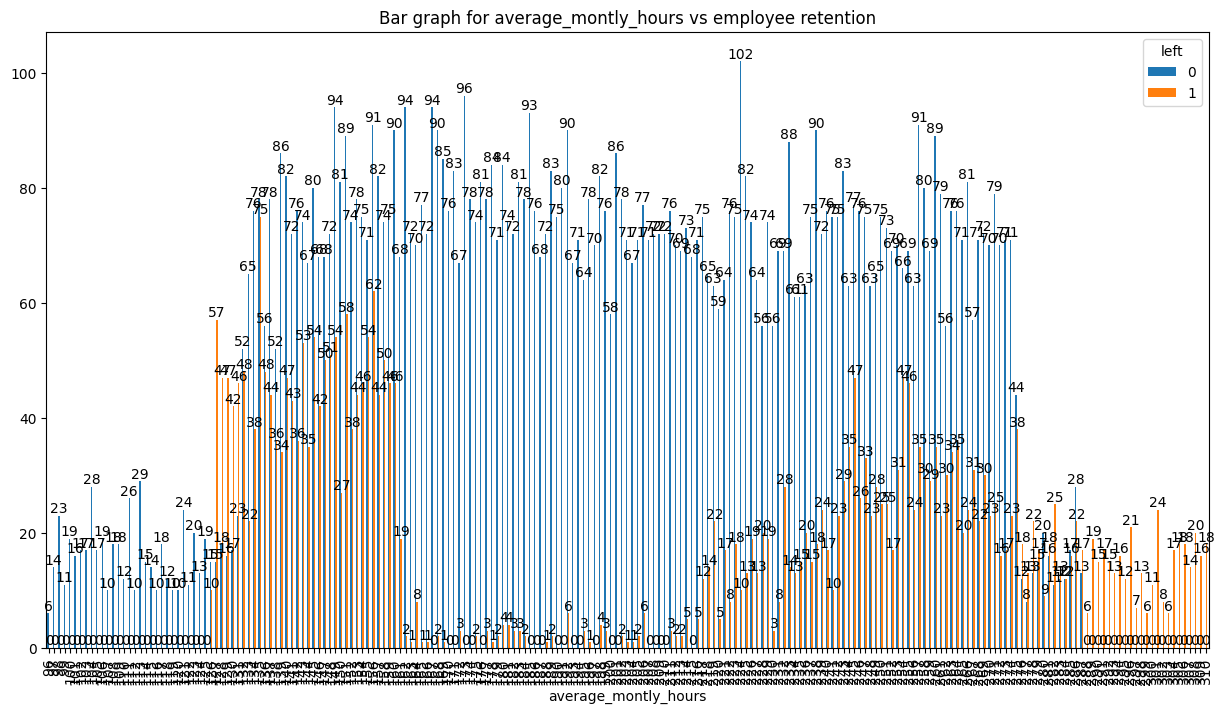

In [22]:
ax = pd.crosstab(data1.average_montly_hours, data1.left).plot(kind = "bar", figsize = (15,8))
for p in ax.containers: # p - represents each bin on the bar
                        # ax.containers contains the bar objects
    ax.bar_label(p)

plt.title("Bar graph for average_montly_hours vs employee retention")

In [23]:
pd.crosstab(data1.promotion_last_5years, data1.left)

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


Text(0.5, 1.0, 'Bar graph for promotion_last_5years vs employee retention')

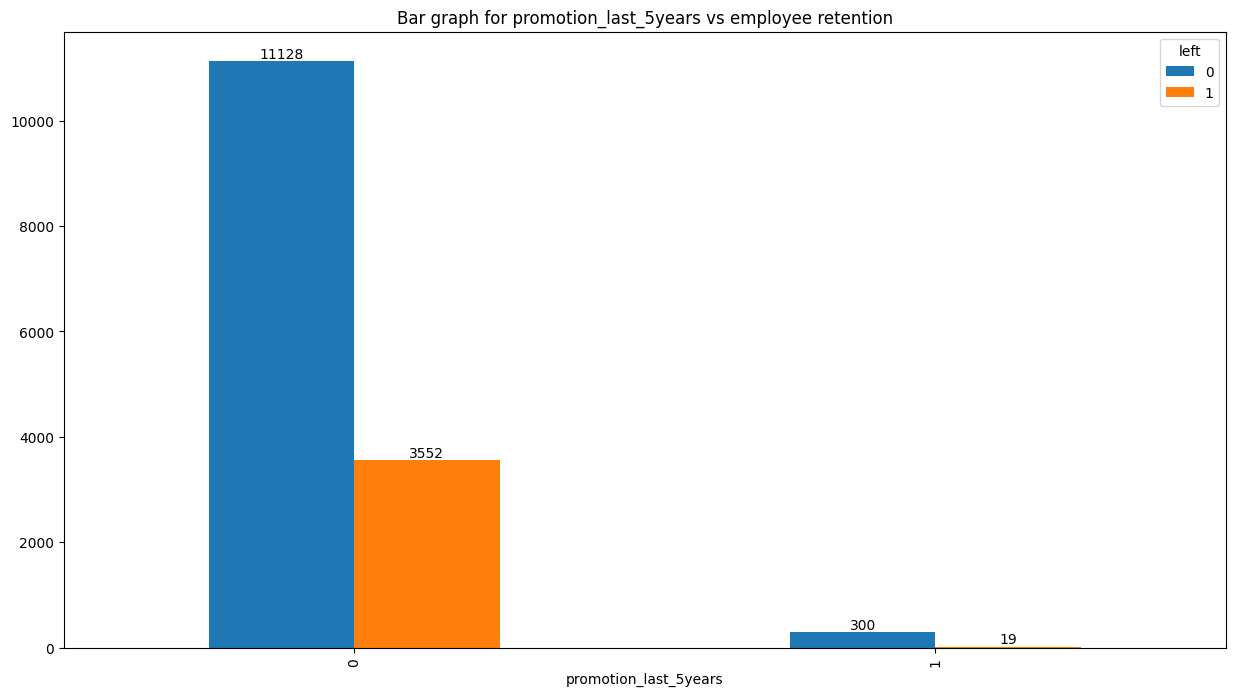

In [24]:
ax = pd.crosstab(data1.promotion_last_5years, data1.left).plot(kind = "bar", figsize = (15,8))
for p in ax.containers: # p - represents each bin on the bar
                        # ax.containers contains the bar objects
    ax.bar_label(p)

plt.title("Bar graph for promotion_last_5years vs employee retention")

In [25]:
pd.crosstab(data1.salary, data1.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


Text(0.5, 1.0, 'Bar graph for salary vs employee retention')

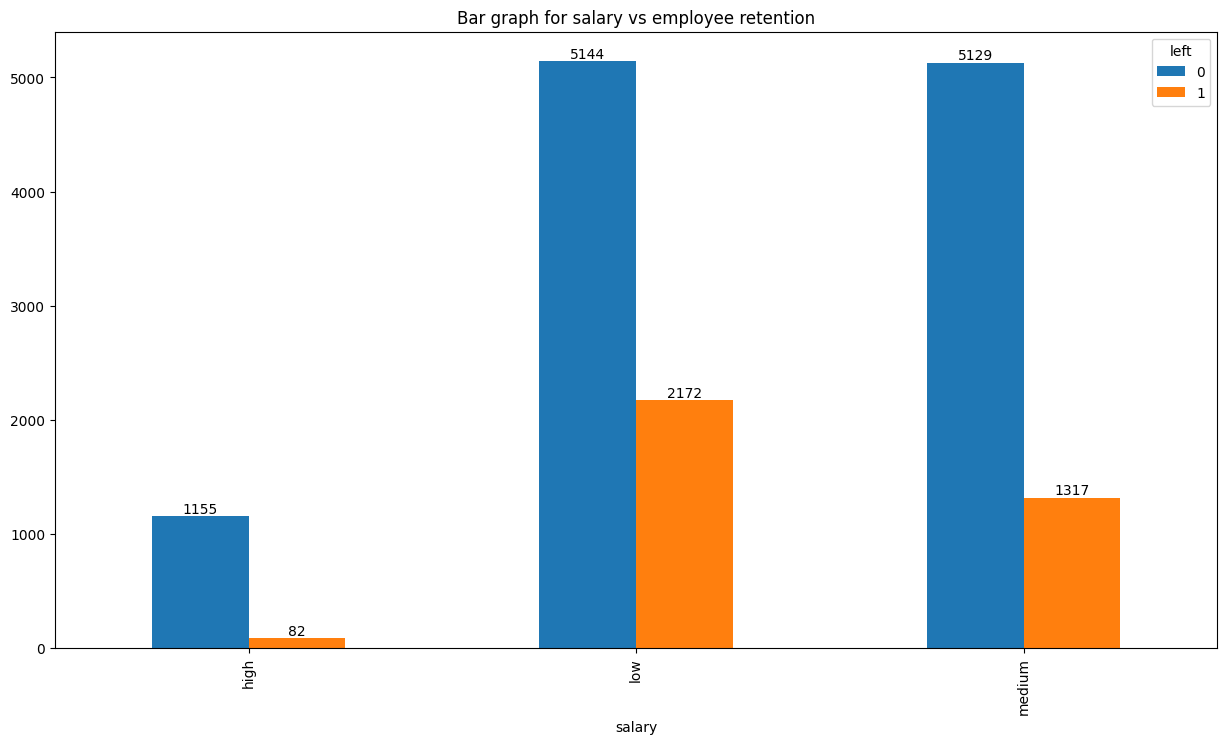

In [26]:
ax = pd.crosstab(data1.salary, data1.left).plot(kind = "bar", figsize = (15,8))
for p in ax.containers: # p - represents each bin on the bar
                        # ax.containers contains the bar objects
    ax.bar_label(p)

plt.title("Bar graph for salary vs employee retention")

### Selecting the most significant variables


In [27]:
data1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [30]:
# variables selection
sel_data = data1 [["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary"]]
sel_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [31]:
sel_data.salary.value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [32]:
dummy = pd.get_dummies(sel_data.salary)
dummy.head()

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [34]:
# concatenating the dummy dataaframe with the eselected dataframe

data2 = pd.concat([sel_data, dummy], axis ='columns')
data2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [44]:
data3 = data2.drop('salary', axis =1)


In [45]:
data3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [46]:
# input variables
X =data3
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [47]:
# selecting the target variable
Y = data1.left
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

### Spliting the dataset

In [48]:
# spliting the 80% of the dataset for training and 20% for testing
from  sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, train_size = 0.8)

In [50]:
X_train.shape

(11999, 6)

In [52]:
# Building the odel using logistic regression
from sklearn.linear_model import LogisticRegression

In [54]:
lr_model = LogisticRegression ()
lr_model

LogisticRegression()

In [55]:
# training the model
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [56]:
# checking the model accuracy
lr_model.score(X_test, Y_test)

0.7646666666666667